In [1]:
import lsst.daf.persistence
import lsst.afw.display as afw_display
from matplotlib import pylab as plt

afw_display.setDefaultBackend("ginga")
%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_DIR_DITHERED = "/global/cscratch1/sd/descdm/DC1/DC1-imsim-dithered/"
butler = lsst.daf.persistence.Butler(DATA_DIR_DITHERED)

In [3]:
calexpId = {'visit':1919421, 'filter':'r', 'raft':'2,2', 'sensor':'1,1'}
coaddId = {'patch':'17,13', 'tract':0, 'filter':'r'}

In [4]:
calexp = butler.get('calexp', dataId=calexpId)
calexp_src = butler.get('src', dataId=calexpId)
coadd = butler.get('deepCoadd', dataId=coaddId)
coadd_src = butler.get('deepCoadd_meas', dataId=coaddId)

In [5]:
catalog_imsim = butler.get("deepCoadd_ref", patch='17,13', tract=0, immediate=True)

Failed to start ginga server on localhost:9914 : [Errno 98] Address already in use


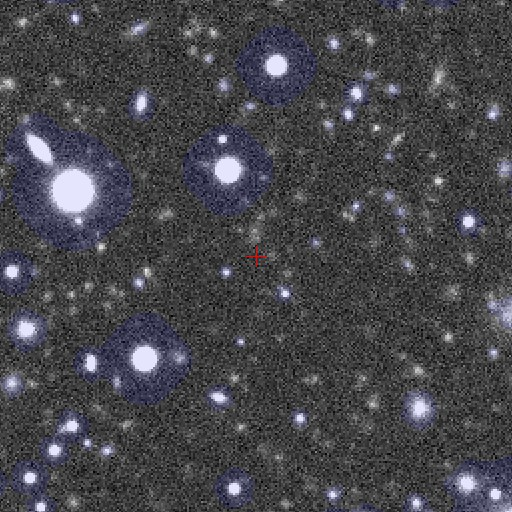

In [6]:
calexp_display = afw_display.Display(1, open=False, canvas_type='png', show_color_bar=True)
calexp_display.setMaskTransparency(90)

coadd_display = afw_display.Display(2, open=False, canvas_type='png')
coadd_display.setMaskTransparency(90)

calexp_display.mtv(calexp, title='Single Calibrated Exposure')
calexp_display.zoom(2)

coadd_display.mtv(coadd, title='Deep Coaddition')
coadd_display.zoom(2)

#with calexp_display.Buffering():     
#         for source in catalog_imsim:
#                 calexp_display.dot('o', source.getX(), source.getY())

#display = calexp_display
display = coadd_display

display.get_viewer().show_color_bar(False)
display.get_viewer().show_pan_mark(True)
#display.get_viewer().embed()
display.show()

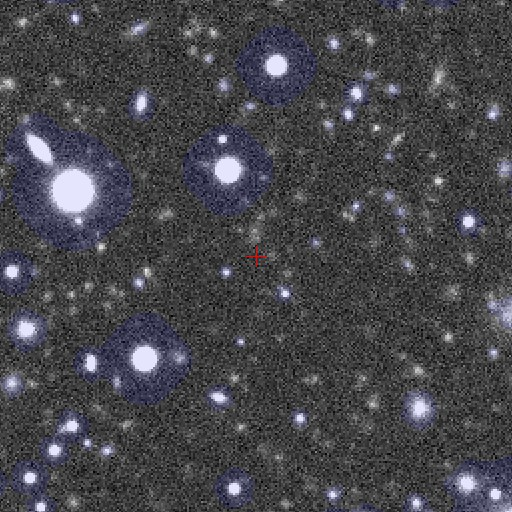

In [7]:
display.show()

In [7]:
# How many sources are there?
print("calexp source length = ", len(coadd_src))

# Get the calibration object from the calexp
coadd_calib = coadd.getCalib()

# Get measured fluxes from cmodel
coadd_cmodelFlux =  coadd_src.getModelFlux()

# Convert to magnitude with the calibration object
coadd_calib.getMagnitude(coadd_cmodelFlux)

calexp source length =  93552


array([         nan,  24.60453025,          nan, ...,  26.59559236,
        24.23438106,          nan])

In [8]:
%%script false

x = catalog_imsim.get("base_SdssCentroid_x")
y = catalog_imsim.get("base_SdssCentroid_y")
for i in range(len(x))[::20]:
    disp.dot('o',x[i],y[i],ctype=afwDisplay.GREEN)
disp.show()
disp.zoom(4)
disp.show()

In [9]:
%%script false

calexp_display = afw_display.getDisplay(frame=1)
coadd_display = afw_display.getDisplay(frame=2)

calexp_display.mtv(calexp)
coadd_display.mtv(coadd)
